In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error,r2_score,\
mean_squared_error
color_pal = sns.color_palette()
plt.style.use("fivethirtyeight")


In [10]:
df = pd.read_csv('SPY.csv' , index_col='Date' , parse_dates=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,92.246048,118944600
2010-01-05,113.260002,113.680000,112.849998,113.629997,92.490204,111579900
2010-01-06,113.519997,113.989998,113.430000,113.709999,92.555328,116074400
2010-01-07,113.500000,114.330002,113.180000,114.190002,92.946060,131091100
2010-01-08,113.889999,114.620003,113.660004,114.570000,93.255348,126402800


In [11]:
df['ClosePrediction'] = df['Close'].shift(1)
df

,Open,High,Low,Close,Adj Close,Volume,ClosePrediction
Date,,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,92.246048,118944600,NaN
2010-01-05,113.260002,113.680000,112.849998,113.629997,92.490204,111579900,113.330002
2010-01-06,113.519997,113.989998,113.430000,113.709999,92.555328,116074400,113.629997
2010-01-07,113.500000,114.330002,113.180000,114.190002,92.946060,131091100,113.709999
2010-01-08,113.889999,114.620003,113.660004,114.570000,93.255348,126402800,114.190002
...,...,...,...,...,...,...,...
2018-12-21,246.740005,249.710007,239.979996,240.699997,234.845886,255345600,247.169998
2018-12-24,239.039993,240.839996,234.270004,234.339996,228.640564,147311600,240.699997
2018-12-26,235.970001,246.179993,233.759995,246.179993,240.192596,218485400,234.339996


In [12]:
y_true = df.iloc[1:]['Close']
y_pred = df.iloc[1:]['ClosePrediction']

#### Main idea : how the vals are retaed to one another. What's good or bad? if R^2 is good will MAE also be good? 

In [14]:
# Sum of Square
y_diff = y_true-y_pred
y_diff.dot(y_diff)
# Just a number


6330.3742894926045

In [15]:
mean_squared_error(y_true,y_pred)

2.798573956451196

In [17]:
(y_diff.dot(y_diff))/len(y_true)

2.7985739564511958

In [18]:
# RMSE
mean_squared_error(y_true,y_pred,squared=False)

1.672893886787562

In [19]:
#MAE
mean_absolute_error(y_true,y_pred)

1.1457559803120336

In [20]:
r2_score(y_true,y_pred)

0.9989603259063914

In [21]:
mean_absolute_percentage_error(y_true,y_pred)

0.006494073151422373

In [23]:
# sMAPE
def smape(y_true,y_pred):
    ratio = np.abs(y_true-y_pred)/((np.abs(y_true)+np.abs(y_pred))/2)
    return ratio.mean()
smape(y_pred,y_true)

0.006491365814068417

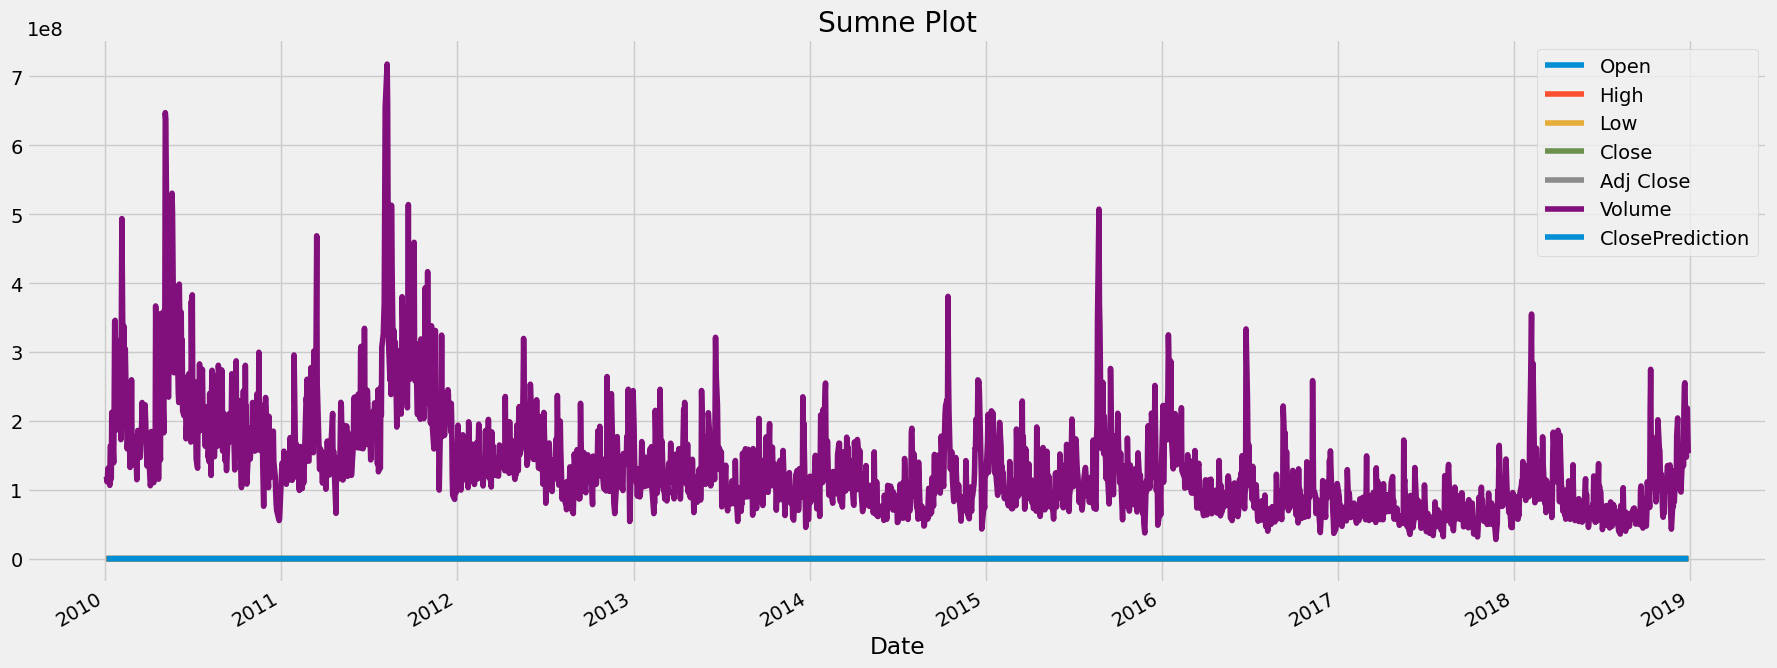

In [26]:
df.plot(
    figsize=(20,8),
    title="Sumne Plot",
    style="-"
)
plt.show()